# Feature Engineering and Logistic Regression

# Introduction

Here I will create feature variables for use with the logistic regerssion model to create a baseline performance for predicting CTR on Google AdWords data.

# Load Processed Data

In [232]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
%matplotlib inline

In [209]:
import pandas as pd
train_data = pd.read_csv('train_data_no_text.csv', 
                        parse_dates=['Date'])

In [210]:
train_data.head()

,Unnamed: 0,Ad ID,Ad group ID,Campaign ID,Keyword ID,Search term match type,Date,Day of week,Device,Quality score,...,Landing page experience,Avg. position,Impressions,Clicks,Cost,Conversions,click_target,ctr,Month,Day of Month
0,0,240574173525,46423626238,908117249,296868692064,Broad,2018-03-26,Monday,Mobile,--,...,--,2.0,1,0,0.00,0.0,0,0.0,3,26
1,1,217160772198,47045144564,908117249,347502862051,Exact,2017-09-01,Friday,Mobile,--,...,--,2.0,1,0,0.00,0.0,0,0.0,9,1
2,2,240574173525,46423626238,908117249,296868692064,Phrase,2018-04-30,Monday,Mobile,--,...,--,3.0,1,0,0.00,0.0,0,0.0,4,30
3,3,357859796080,53253585965,1376132377,442183914904,Exact,2019-07-05,Friday,Mobile,9,...,Above average,1.0,1,1,0.38,0.5,1,1.0,7,5
4,4,314179203506,53253584085,1376048789,354206717502,Exact,2019-07-06,Saturday,Desktop,9,...,Above average,1.0,1,1,0.27,0.0,1,1.0,7,6


In [211]:
train_data.columns

Index(['Unnamed: 0', 'Ad ID', 'Ad group ID', 'Campaign ID', 'Keyword ID',
       'Search term match type', 'Date', 'Day of week', 'Device',
       'Quality score', 'Expected clickthrough rate', 'Ad relevance',
       'Keyword max CPC', 'First position CPC', 'Top of page CPC',
       'Landing page experience', 'Avg. position', 'Impressions', 'Clicks',
       'Cost', 'Conversions', 'click_target', 'ctr', 'Month', 'Day of Month'],
      dtype='object')

In [212]:
# for drop text based features
train_data.drop(columns=['Unnamed: 0', 'Ad group ID', 'Conversions'], inplace=True)

In [213]:
train_data.head()

,Ad ID,Campaign ID,Keyword ID,Search term match type,Date,Day of week,Device,Quality score,Expected clickthrough rate,Ad relevance,...,Top of page CPC,Landing page experience,Avg. position,Impressions,Clicks,Cost,click_target,ctr,Month,Day of Month
0,240574173525,908117249,296868692064,Broad,2018-03-26,Monday,Mobile,--,--,--,...,0.80,--,2.0,1,0,0.00,0,0.0,3,26
1,217160772198,908117249,347502862051,Exact,2017-09-01,Friday,Mobile,--,--,--,...,0.35,--,2.0,1,0,0.00,0,0.0,9,1
2,240574173525,908117249,296868692064,Phrase,2018-04-30,Monday,Mobile,--,--,--,...,0.80,--,3.0,1,0,0.00,0,0.0,4,30
3,357859796080,1376132377,442183914904,Exact,2019-07-05,Friday,Mobile,9,Above average,Average,...,0.14,Above average,1.0,1,1,0.38,1,1.0,7,5
4,314179203506,1376048789,354206717502,Exact,2019-07-06,Saturday,Desktop,9,Above average,Average,...,0.12,Above average,1.0,1,1,0.27,1,1.0,7,6


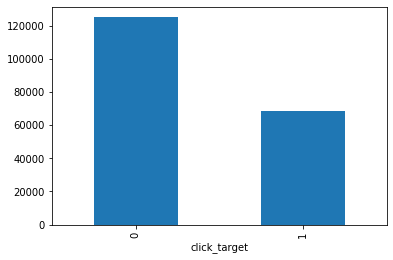

In [214]:
# a quick glance at class balance
train_data.groupby('click_target').size().plot(kind = 'bar')

There is class imbalnce this will ned to tbe fixed before modelling

# Pre-Processing

In [215]:
# check for any NaN
print(train_data.isna().values.sum())

0


## Create new features from time


In [216]:
train_data['Day of Year'] = train_data['Date'].dt.dayofyear
train_data['Week of Year'] = train_data['Date'].dt.week
train_data['Day of Week'] = train_data['Date'].dt.dayofweek

### Remove all NaN 

In [217]:
# take one value for sense checking
train_data.head()

,Ad ID,Campaign ID,Keyword ID,Search term match type,Date,Day of week,Device,Quality score,Expected clickthrough rate,Ad relevance,...,Impressions,Clicks,Cost,click_target,ctr,Month,Day of Month,Day of Year,Week of Year,Day of Week
0,240574173525,908117249,296868692064,Broad,2018-03-26,Monday,Mobile,--,--,--,...,1,0,0.00,0,0.0,3,26,85,13,0
1,217160772198,908117249,347502862051,Exact,2017-09-01,Friday,Mobile,--,--,--,...,1,0,0.00,0,0.0,9,1,244,35,4
2,240574173525,908117249,296868692064,Phrase,2018-04-30,Monday,Mobile,--,--,--,...,1,0,0.00,0,0.0,4,30,120,18,0
3,357859796080,1376132377,442183914904,Exact,2019-07-05,Friday,Mobile,9,Above average,Average,...,1,1,0.38,1,1.0,7,5,186,27,4
4,314179203506,1376048789,354206717502,Exact,2019-07-06,Saturday,Desktop,9,Above average,Average,...,1,1,0.27,1,1.0,7,6,187,27,5


### Replace '--' in AdWords Data with NaN

In [218]:
# replace '--' with NaN
train_data = train_data.replace({'--': np.nan}, regex=True)

In [219]:
# remove all entries with NaN
train_data = train_data.dropna()

In [220]:
# check for any NaN
print(train_data.isna().values.sum())

0


In [221]:
# take one value for sense checking
train_data.head()

,Ad ID,Campaign ID,Keyword ID,Search term match type,Date,Day of week,Device,Quality score,Expected clickthrough rate,Ad relevance,...,Impressions,Clicks,Cost,click_target,ctr,Month,Day of Month,Day of Year,Week of Year,Day of Week
3,357859796080,1376132377,442183914904,Exact,2019-07-05,Friday,Mobile,9,Above average,Average,...,1,1,0.38,1,1.000000,7,5,186,27,4
4,314179203506,1376048789,354206717502,Exact,2019-07-06,Saturday,Desktop,9,Above average,Average,...,1,1,0.27,1,1.000000,7,6,187,27,5
8,314179203965,1376133520,315359911820,Broad,2019-07-07,Sunday,Tablet,8,Above average,Below average,...,2,0,0.00,0,0.000000,7,7,188,27,6
9,357859796818,1376524026,443040648236,Phrase,2019-07-17,Wednesday,Mobile,8,Above average,Below average,...,1,1,0.07,1,1.000000,7,17,198,29,2
11,314179203962,1376133520,441743760160,Broad,2019-07-17,Wednesday,Mobile,8,Above average,Below average,...,3,2,0.67,1,0.666667,7,17,198,29,2


## Create category data

In [222]:
# create cateogry df
cat_df = train_data.select_dtypes(include=['object']).apply(pd.Series.astype, dtype='category')

In [223]:
# remove object columns
train_data_obj = train_data.select_dtypes(exclude=['object'])

In [224]:
# concat new cat columns
train_data = pd.concat([train_data_obj, cat_df], axis=1)

In [225]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118563 entries, 3 to 194263
Data columns (total 25 columns):
Ad ID                         118563 non-null int64
Campaign ID                   118563 non-null int64
Keyword ID                    118563 non-null int64
Date                          118563 non-null datetime64[ns]
Keyword max CPC               118563 non-null float64
First position CPC            118563 non-null float64
Top of page CPC               118563 non-null float64
Avg. position                 118563 non-null float64
Impressions                   118563 non-null int64
Clicks                        118563 non-null int64
Cost                          118563 non-null float64
click_target                  118563 non-null int64
ctr                           118563 non-null float64
Month                         118563 non-null int64
Day of Month                  118563 non-null int64
Day of Year                   118563 non-null int64
Week of Year                  118563

In [226]:
train_data.size

2964075

In [227]:
train_data.reset_index(inplace=True)

In [230]:
train_data.drop(columns=['index'], inplace=True)

In [231]:
train_data.head()

,Ad ID,Campaign ID,Keyword ID,Date,Keyword max CPC,First position CPC,Top of page CPC,Avg. position,Impressions,Clicks,...,Day of Year,Week of Year,Day of Week,Search term match type,Day of week,Device,Quality score,Expected clickthrough rate,Ad relevance,Landing page experience
0,357859796080,1376132377,442183914904,2019-07-05,0.51,0.75,0.14,1.00,1,1,...,186,27,4,Exact,Friday,Mobile,9,Above average,Average,Above average
1,314179203506,1376048789,354206717502,2019-07-06,0.60,0.12,0.12,1.00,1,1,...,187,27,5,Exact,Saturday,Desktop,9,Above average,Average,Above average
2,314179203965,1376133520,315359911820,2019-07-07,0.51,0.34,0.18,1.00,2,0,...,188,27,6,Broad,Sunday,Tablet,8,Above average,Below average,Above average
3,357859796818,1376524026,443040648236,2019-07-17,0.17,0.34,0.06,1.00,1,1,...,198,29,2,Phrase,Wednesday,Mobile,8,Above average,Below average,Above average
4,314179203962,1376133520,441743760160,2019-07-17,0.51,0.37,0.31,1.33,3,2,...,198,29,2,Broad,Wednesday,Mobile,8,Above average,Below average,Above average


In [234]:
# select these cat columns for later
categorical_columns = list(train_data.select_dtypes(['category']).columns)

In [254]:
categorical_columns

['Search term match type',
 'Day of week',
 'Device',
 'Quality score',
 'Expected clickthrough rate',
 'Ad relevance',
 'Landing page experience']

### Ordinal Data Encoding

In [250]:
from category_encoders.ordinal import OrdinalEncoder

ModuleNotFoundError: No module named 'category_encoders'

`Quality score`, `Expected clickthrough rate`, `Ad relevance` and `Landing page experience` are all categorical variables that should be encoded as ordered data. The values have inherent information in relation to each other

In [236]:
ordinal_categorical_columns = categorical_columns[3:]

In [270]:
one_hot_categorical_columns = list( categorical_columns[i] for i in [0, 2] )

In [271]:
one_hot_categorical_columns

['Search term match type', 'Device']

In [237]:
ordinal_categorical_columns

['Quality score',
 'Expected clickthrough rate',
 'Ad relevance',
 'Landing page experience']

In [246]:
enc = OrdinalEncoder()

In [252]:
for column_name in ordinal_categorical_columns:
    enc.fit(train_data[column_name].reshape(-1,1))

AttributeError: 'Series' object has no attribute 'reshape'

In [243]:
ordinal_col_mapping = [{'col': column_name,
                        'mapping': list(zip(train_data[column_name].cat.categories,
                        train_data[column_name].cat.codes))}
                       for column_name in ordinal_categorical_columns]
                                        

In [245]:
ord_enc = OrdinalEncoder(cols=categorical_columns, mapping=ordinal_col_mapping)
ord_enc

TypeError: __init__() got an unexpected keyword argument 'cols'

### One-Hot Encoding

In [ ]:
# get dummies encoding
train_data = train_data.copy()
cat_df_flights_onehot = pd.get_dummies(train_data, columns=['Search term match type', 'Device', ''], prefix = ['carrier'])

print(cat_df_flights_onehot.head())

## Cyclical Encoding of Time

A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

We can do that using the following transformations:

$x_{sin} = \sin(\frac{2 * \pi * x}{\max(x)})$

$x_{cos} = \cos(\frac{2 * \pi * x}{\max(x)})$

Let's do this for the time components that are cyclical

In [274]:
# encoding cyclical features
train_data['day_of_week_sin'] = np.sin(train_data['Day of week'])*(2.*np.pi/7)
train_data['day_of_week_cos'] = np.cos(train_data['Day of week'])*(2.*np.pi/7)
train_data['month_sin'] = np.sin((train_data['Month']-1)*(2.*np.pi/12))
train_data['month_cos'] = np.cos((train_data['Month']-1)*(2.*np.pi/12))
train_data['day_of_year_sin'] = np.sin((train_data['Day of Year']-1)*(2.*np.pi/365))
train_data['day_of_year_cos'] = np.cos((train_data['Day of Year']-1)*(2.*np.pi/365))
# date or day of month is a potential to investigate later ie. 31, 26 etc

TypeError: Series with dtype category cannot perform the numpy op sin

In [ ]:
# create train and test datasets


## Correcting Class Imbalance

### Upsampling

In [ ]:
from sklearn.utils import resample

# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()
    1    213245
    0    213245

In [ ]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

# Checking accuracy
accuracy_score(y_test, upsampled_pred)
    0.9807
    
# f1 score
f1_score(y_test, upsampled_pred)
    0.1437
    
recall_score(y_test, upsampled_pred)
    0.8712

### Downsampling

In [ ]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

# Checking accuracy
accuracy_score(y_test, undersampled_pred)
    0.9758

# f1 score
f1_score(y_test, undersampled_pred)
    0.1171

recall_score(y_test, undersampled_pred)
    0.8636

In [ ]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()
    1    360
    0    360
    

### SMOTE Resampling

# Feature Selection

In [ ]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load the iris datasets
dataset = datasets.load_iris()
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(dataset.data, dataset.target)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets
dataset = datasets.load_iris()
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(dataset.data, dataset.target)
# display the relative importance of each attribute
print(model.feature_importances_)

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.4)
data_test, data_val = train_test_split(data_test, test_size=0.5)


# Standardization 

In [ ]:
# Standardise and nrmalise
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X), y, test_size=0.33, random_state=42)

# Evaluation Metrics

Change the performance metric

As we saw above, accuracy is not the best metric to use when evaluating imbalanced datasets as it can be very misleading. Metrics that can provide better insight include:
1. Confusion Matrix: a table showing correct predictions and types of incorrect predictions.

2. Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
3. Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
4. F1: Score: the weighted average of precision and recall.

### F1-score as a fucntion of regularization (penalty) parameter

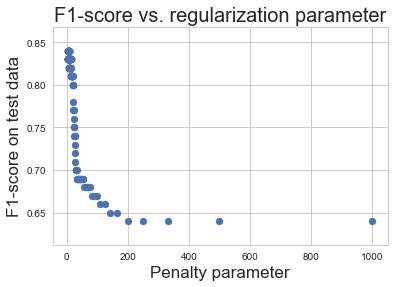

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu
for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=100,n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        predictions[i] = logmodel[i].predict(X_test)
        class_report[i] = classification_report(y_test,predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

### F1-score as a function of test set size (fraction)

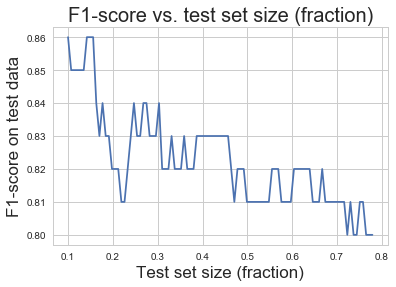

In [197]:
nsimu=101
class_report = [0]*nsimu
f1=[0]*nsimu
test_fraction =[0]*nsimu
for i in range(1,nsimu):
        X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.1+(i-1)*0.007, 
                                                    random_state=111)
        logmodel =(LogisticRegression(C=1,tol=1e-4, max_iter=1000,n_jobs=4))
        logmodel.fit(X_train,y_train)
        predictions = logmodel.predict(X_test)
        class_report[i] = classification_report(y_test,predictions)
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        test_fraction[i]=0.1+(i-1)*0.007

plt.plot(test_fraction[1:len(test_fraction)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. test set size (fraction)",fontsize=20)
plt.xlabel("Test set size (fraction)",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()